# TFM: La Ciberseguridad en Educación Secundaria: Análisis contextual y propuesta de recurso digital - Máster Profesorado USC
### Autor: Alberto Pampín Pérez
#### Directora: Silvia López Gómez

En primer lugar se deben realizar los imports necesarios

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

Ahora se lleva a cabo la carga del fichero .csv que contiene los resultados de nuestro cuestionario:

In [2]:
csv_path = './results.csv'
df = pd.read_csv(csv_path, sep=';')
df.head()

,ID,Start time,Completion time,Email,Name,¿En qué grupo te encuentras?,¿Crees que tus conocimientos sobre Ciberseguridad son suficientes para resolver cualquier situación en tu día a día?,¿Sabrías decir con qué institución puedes contactar a través del 017 ☎️?\r\n,¿Sabrías definir e identificar un ataque de SMISHING?,Si una página web tiene el candado 🔒 (HTTPS) ¿Es segura?,"¿Has oído hablar alguna vez del servicio ""Tu Ayuda en Ciberseguridad"" de INCIBE?",¿Conoces la OSI y alguna de sus campañas/recursos?,Unnamed: 12
0,5,1/18/23 16:43:03,1/18/23 16:44:06,anonymous,NaN,Estudiante,Necesito más formación ❌,NaN,No ❌,No ❌,Sí ✅,No ❌,NaN
1,6,1/23/23 12:10:10,1/23/23 12:10:44,anonymous,NaN,Alumno/a ESO / Bachillerato 🧑🏽,Sé suficiente ✅,NaN,No ❌,Sí ✅,No ❌,No ❌,NaN
2,7,1/23/23 12:10:04,1/23/23 12:10:49,anonymous,NaN,Alumno/a ESO / Bachillerato 🧑🏽,Necesito más formación ❌,NaN,No ❌,Sí ✅,No ❌,No ❌,NaN
3,8,1/23/23 12:10:13,1/23/23 12:10:54,anonymous,NaN,Alumno/a ESO / Bachillerato 🧑🏽,Sé suficiente ✅,NaN,Sí ✅,Sí ✅,No ❌,No ❌,NaN
4,9,1/23/23 12:11:08,1/23/23 12:11:40,anonymous,NaN,Estudiante Fp,Necesito más formación ❌,NaN,No ❌,Sí ✅,No ❌,No ❌,NaN


Los campos ID, Start time, Completion time, Email y Name son inservibles, por lo que se procede a descartarlos. Además, se cambiarán los nombres de las columnas para hacerlos más cortos

In [3]:
df.drop(columns = ['ID', 'Start time', 'Completion time', 'Email', 'Name', 'Unnamed: 12'], inplace=True)
df.columns = ['Group', 'HaveEnoughKnowledge', '017', 'Def&IdenSmishing', 'isHTTPSWebSecure', 'KnowTuAyudaCib', 'KnowOSI']
df.head()

,Group,HaveEnoughKnowledge,017,Def&IdenSmishing,isHTTPSWebSecure,KnowTuAyudaCib,KnowOSI
0,Estudiante,Necesito más formación ❌,NaN,No ❌,No ❌,Sí ✅,No ❌
1,Alumno/a ESO / Bachillerato 🧑🏽,Sé suficiente ✅,NaN,No ❌,Sí ✅,No ❌,No ❌
2,Alumno/a ESO / Bachillerato 🧑🏽,Necesito más formación ❌,NaN,No ❌,Sí ✅,No ❌,No ❌
3,Alumno/a ESO / Bachillerato 🧑🏽,Sé suficiente ✅,NaN,Sí ✅,Sí ✅,No ❌,No ❌
4,Estudiante Fp,Necesito más formación ❌,NaN,No ❌,Sí ✅,No ❌,No ❌


Ahora se procede a cambiar en todo el dataset los valores 'No ❌' por False y 'Sí ✅' por True. Lo mismo se hace para 'Necesito más formación ❌' y 'Sé suficiente ✅'

In [4]:
df.replace({
    'No ❌': False,
    'Sí ✅': True,
    'Necesito más formación ❌': False,
    'Sé suficiente ✅': True
}, inplace=True)
df.head()

,Group,HaveEnoughKnowledge,017,Def&IdenSmishing,isHTTPSWebSecure,KnowTuAyudaCib,KnowOSI
0,Estudiante,False,NaN,False,False,True,False
1,Alumno/a ESO / Bachillerato 🧑🏽,True,NaN,False,True,False,False
2,Alumno/a ESO / Bachillerato 🧑🏽,False,NaN,False,True,False,False
3,Alumno/a ESO / Bachillerato 🧑🏽,True,NaN,True,True,False,False
4,Estudiante Fp,False,NaN,False,True,False,False


Ahora se crea una gráfica de tarta para comprobar la participación en el cuestionario por grupos

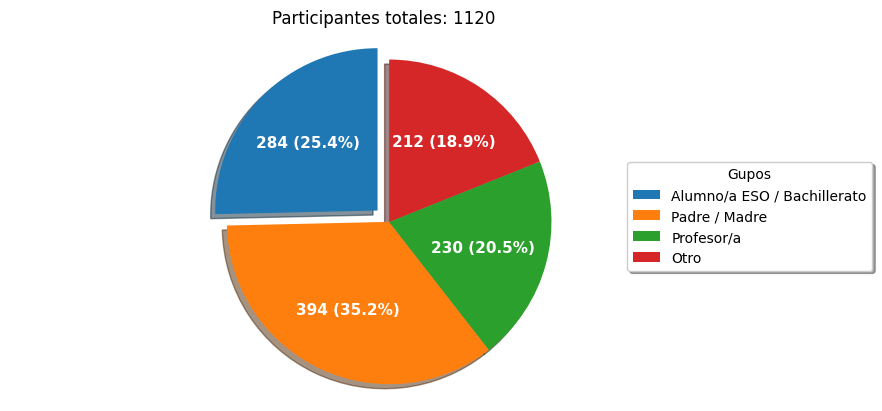

In [5]:
# Se eliminan los emojis del dataset y los espacios entre el fin de la palabra y el emoji
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df['Group'] = df['Group'].str.rstrip()

# Se agrupan las respuestas de los usuarios que no forman parte de los 3 grupos principales
df.loc[~df["Group"].isin(['Alumno/a ESO / Bachillerato', 'Padre / Madre',  'Profesor/a']), "Group"] = "Otro"

# Lista con los grupos y se calcula el número de participantes de cada grupo
groups = np.roll(df['Group'].unique(), -1)
participants = [len(df[df['Group'] == x]) for x in groups]

# Construcción de la gráfica
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.1f}%)'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
wedges, texts, a = ax1.pie(participants,
                           explode=(0.1, 0, 0, 0),
                           labels=groups,
                           startangle=90,
                           autopct=make_autopct(participants),
                           textprops={'fontsize': 11, 'color': 'white', 'weight':'bold'},
                           shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Participantes totales: ' + str(len(df)))
ax1.legend(wedges,
           groups,
           title="Gupos",
           loc="center right",
           fancybox=True,
           shadow=True,
           bbox_to_anchor=(1.5,0.5))

plt.show()

Resulta realmente interesante conocer las respuestas de los distintos grupos a cada una de las preguntas. Para ello se crearán múltiples diagramas de barras.

La primera gráfica representa el conocimiento o no de las instituciones y camapañas

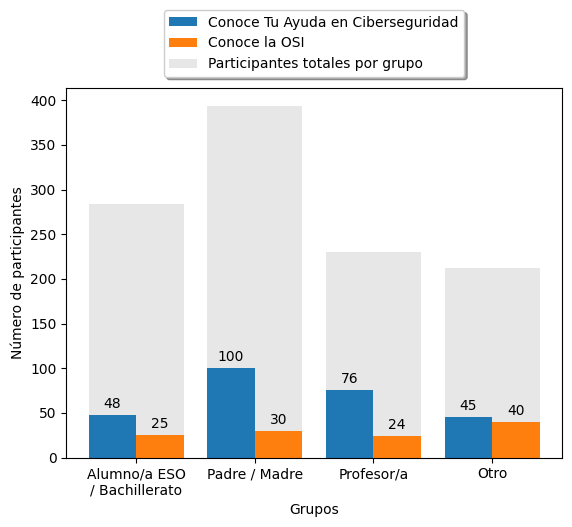

In [6]:
# Dos listas en las que se recoge cuantas personas de cada grupo conocen cada institución
incibe, osi = [], []
for x in groups:
    incibe.append(df[df['Group'] == x]['KnowTuAyudaCib'].value_counts()['True'])
    osi.append(df[df['Group'] == x]['KnowOSI'].value_counts()['True'])

width = 0.4
X_axis = np.arange(len(groups))
rects1 = plt.bar(X_axis - 0.2, incibe, width, label = 'Conoce Tu Ayuda en Ciberseguridad')
plt.bar(X_axis - 0.2, np.subtract(participants, incibe), width, bottom=incibe, color=(0.1, 0.1, 0.1, 0.1))

rects2 = plt.bar(X_axis + 0.2, osi, width, label = 'Conoce la OSI')
plt.bar(X_axis + 0.2, np.subtract(participants, osi), width, bottom=osi, color=(0.1, 0.1, 0.1, 0.1), label='Participantes totales por grupo')

labels = np.copy(groups)
labels[0] = 'Alumno/a ESO\n/ Bachillerato'
plt.xticks(X_axis, labels)
plt.xlabel("Grupos")
plt.ylabel("Número de participantes")
# plt.title("Participantes que conocen INCIBE y OSI")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.23),
          ncol=1, fancybox=True, shadow=True)
plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)

plt.show()

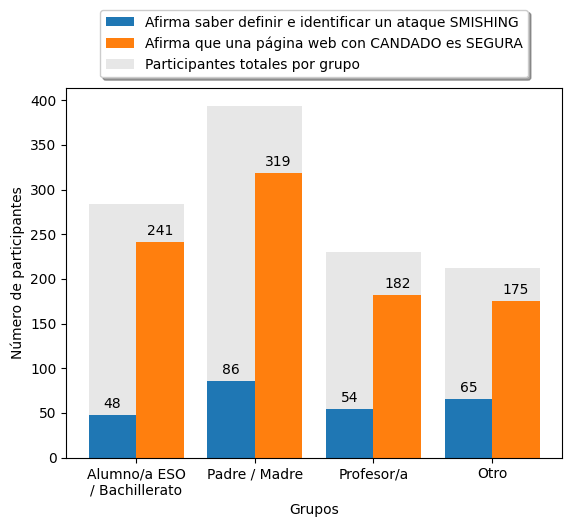

In [7]:
# Dos listas en las que se recoge si la respuesta a la pregunta ha sido afirmativa
smishing, https = [], []
for x in groups:
    smishing.append(df[df['Group'] == x]['Def&IdenSmishing'].value_counts()['True'])
    https.append(df[df['Group'] == x]['isHTTPSWebSecure'].value_counts()['True'])

width = 0.4
X_axis = np.arange(len(groups))
rects1 = plt.bar(X_axis - 0.2, smishing, width, label = 'Afirma saber definir e identificar un ataque SMISHING')
plt.bar(X_axis - 0.2, np.subtract(participants, smishing), width, bottom=smishing, color=(0.1, 0.1, 0.1, 0.1))

rects2 = plt.bar(X_axis + 0.2, https, width, label = 'Afirma que una página web con CANDADO es SEGURA')
plt.bar(X_axis + 0.2, np.subtract(participants, https), width, bottom=https, color=(0.1, 0.1, 0.1, 0.1), label='Participantes totales por grupo')

labels = np.copy(groups)
labels[0] = 'Alumno/a ESO\n/ Bachillerato'
plt.xticks(X_axis, labels)
plt.xlabel("Grupos")
plt.ylabel("Número de participantes")
# plt.title("Participantes que responden SÍ a las preguntas 4 y 5")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.23),
          ncol=1, fancybox=True, shadow=True)
plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)

plt.show()

Veamos las respuestas a las preguntas 'técnicas' de aquellos que afirman saber suficiente sobre Ciberseguridad para resolver cualquier situación en su día a día

In [8]:
# DataFrame de aquellos que se consideran sabios (savants)
savants = df[df['HaveEnoughKnowledge'] == str(True)]
smishing = savants['Def&IdenSmishing'].value_counts()['True']
https = savants['isHTTPSWebSecure'].value_counts()['True']

print('\n----------------------------------------------\n\n De los ' + str(sum(participants)) + ' participantes, ' + str(len(savants)) + ' ('  + str(round(len(savants) / sum(participants) * 100.0, 2)) + '%) afirman saber suficiente sobre Ciberseguridad para resolver cualquier situación en su día a día. De los cuales ' + str(smishing) + ' (' + str(round(smishing / len(savants) * 100.0, 2)) + '%) afirman saber definir e identificar un ataque de tipo SMISHING y ' + str(https) + ' (' + str(round(https / len(savants) * 100.0, 2)) + '%) afirman que una página web con CANDADO es SEGURA\n\n----------------------------------------------\n')


----------------------------------------------

 De los 1120 participantes, 242 (21.61%) afirman saber suficiente sobre Ciberseguridad para resolver cualquier situación en su día a día. De los cuales 122 (50.41%) afirman saber definir e identificar un ataque de tipo SMISHING y 192 (79.34%) afirman que una página web con CANDADO es SEGURA

----------------------------------------------



Veamos cuántas personas conocen la institución correspondiente al teléfono 017 (INCIBE - Tu Ayuda en CIberseguridad). Así sabremos si las campañas de la Administracións han logrado promocionar suficientemente esta vía de contacto.

In [9]:
# Participantes que han respondido
answersQ3 = df[df['017'] != 'nan']
answersQ3

,Group,HaveEnoughKnowledge,017,Def&IdenSmishing,isHTTPSWebSecure,KnowTuAyudaCib,KnowOSI
5,Alumno/a ESO / Bachillerato,True,INCIBE,True,False,True,False
6,Alumno/a ESO / Bachillerato,False,Ni puta idea,True,True,False,False
9,Padre / Madre,False,INCIBE,False,True,True,False
16,Otro,True,INCIBE,False,True,True,True
19,Alumno/a ESO / Bachillerato,True,Ciberseguridad,True,True,False,False
...,...,...,...,...,...,...,...
1105,Profesor/a,False,El INCIBE??,True,True,True,False
1106,Profesor/a,False,Incibe,True,True,True,False
1113,Otro,False,No,False,True,False,False
1116,Profesor/a,True,INCIBE,True,True,True,True


Recordemos que se la ha indicado a los participantes que en caso de no conocer la respuesta, dejasen el cuadro de texto en blanco. Aunque las indicaciones hayan sido claras, muchos de ellos han respondido 'No' o 'Ni idea' y otros han dado respuestas genéricas como 'Ciberseguridad', 'Teléfono de ayuda en ciberseguridad'. Estas aportaciones carecen de valor y serán despreciadas.

Se aplicará un filtro en el que se considera que las coincidencias 'INCIBE' (case-insensitive) e 'Instituto' son aportaciones válidas

In [10]:
know017 = answersQ3.loc[answersQ3['017'].str.contains('incibe|instituto', case = False)]

print('\n----------------------------------------------\n\n'
      'De los ' + str(sum(participants)) + ' participantes, tan solo ' + str(len(answersQ3)) + ' ('  + str(round(len(answersQ3) / sum(participants) * 100.0, 2)) + '%) han respondido la Pregunta 3. Una vez descartadas las respuestas sin valor (solo se dan por buenas las coincidencias \'incibe\' e \'instituto\'), tan solo ' + str(len(know017)) + ' ('  + str(round(len(know017) / sum(participants) * 100.0, 2)) + '%) supieron identificar que el 017 es el teléfono de contacto con el INCIBE (Tu Ayuda en Ciberseguridad)\n\n----------------------------------------------\n')

know017


----------------------------------------------

De los 1120 participantes, tan solo 302 (26.96%) han respondido la Pregunta 3. Una vez descartadas las respuestas sin valor (solo se dan por buenas las coincidencias 'incibe' e 'instituto'), tan solo 92 (8.21%) supieron identificar que el 017 es el teléfono de contacto con el INCIBE (Tu Ayuda en Ciberseguridad)

----------------------------------------------



,Group,HaveEnoughKnowledge,017,Def&IdenSmishing,isHTTPSWebSecure,KnowTuAyudaCib,KnowOSI
5,Alumno/a ESO / Bachillerato,True,INCIBE,True,False,True,False
9,Padre / Madre,False,INCIBE,False,True,True,False
16,Otro,True,INCIBE,False,True,True,True
32,Padre / Madre,False,Incibe?,False,True,True,False
80,Padre / Madre,True,Incibe,True,True,True,False
...,...,...,...,...,...,...,...
1102,Profesor/a,False,INCIBE,True,True,True,False
1105,Profesor/a,False,El INCIBE??,True,True,True,False
1106,Profesor/a,False,Incibe,True,True,True,False
1116,Profesor/a,True,INCIBE,True,True,True,True


Si desglosamos esta información en los grupos definidos

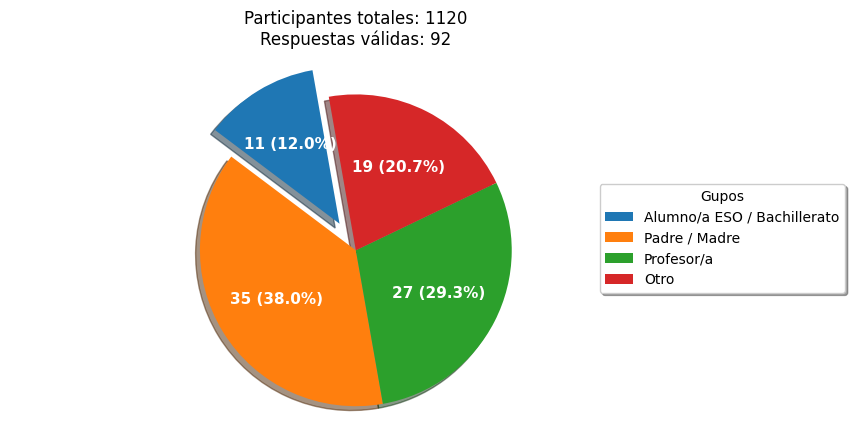

In [11]:
know017Grouped = [len(know017[know017['Group'] == x]) for x in groups]

fig1, ax1 = plt.subplots()
wedges, texts, a = ax1.pie(know017Grouped,
                           explode=(0.2, 0, 0, 0),
                           labels=groups,
                           startangle=100,
                           autopct=make_autopct(know017Grouped),
                           textprops={'fontsize': 11, 'color': 'white', 'weight':'bold'},
                           shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Participantes totales: ' + str(len(df)) + '\nRespuestas válidas: ' + str(len(know017)))
ax1.legend(wedges,
           groups,
           title="Gupos",
           loc="center right",
           fancybox=True,
           shadow=True,
           bbox_to_anchor=(1.5,0.5))

plt.show()